## Libraries

In [1]:
# Main libraries installation
!pip install geopandas requests contextily folium > nul

In [2]:
# Import necessary libraries
import geopandas as gpd      # For working with geospatial data
import pandas as pd          # For data manipulation and analysis
import os                    # For operating system-related functionality
import io                    # For input/output operations
import contextily as cx      # For basemaps and context tiles
import matplotlib.pyplot as plt  # For creating visualizations
from rasterio.crs import CRS  # For handling coordinate reference systems
import folium                # For creating interactive maps
from folium.plugins import MarkerCluster  # For clustering markers on the map
from IPython.display import display_javascript  # For displaying JavaScript in IPython
import plotly.express as px
import warnings  # Library for managing warnings
warnings.filterwarnings("ignore")  # Ignore warnings during runtime
import matplotlib.patheffects as path_effects # For import text effects

import plotly.io as pio  # Library for handling Plotly I/O
from IPython.display import Image  # Library for displaying images in IPython environment

## Data Ingestion

In [3]:
# Path to the GeoJSON file
geojson_path = 'data/in_geojson/geoBoundaries-NPL-ADM2.geojson'

# Load the GeoJSON into a GeoDataFrame
gdf_geojson = gpd.read_file(geojson_path)

## Data Exploring

In [4]:
# Display information about the GeoDataFrame
gdf_geojson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0    NAME     77 non-null     object  
 1   LEVEL     77 non-null     object  
 2   shapeISO  77 non-null     object  
 3   geometry  77 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 2.5+ KB


In [5]:
# Display the first few rows of the GeoDataFrame
gdf_geojson.head()

,NAME,LEVEL,shapeISO,geometry
0,ACHHAM,ADM2,,"POLYGON ((81.46795 29.27183, 81.46739 29.27183..."
1,ARGHAKHANCHI,ADM2,,"POLYGON ((83.05092 28.11155, 83.05075 28.11142..."
2,BAGLUNG,ADM2,,"POLYGON ((83.10730 28.63216, 83.10721 28.63218..."
3,BAITADI,ADM2,,"POLYGON ((80.79591 29.68825, 80.79572 29.68839..."
4,BAJHANG,ADM2,,"POLYGON ((80.90816 29.44139, 80.90795 29.44204..."


In [6]:
# Print the original Coordinate Reference System (CRS) of the GeoDataFrame
print(gdf_geojson.crs)

EPSG:4326


In [7]:
# Set the Coordinate Reference System (CRS) to EPSG:4326
gdf_geojson = gdf_geojson.set_crs(4326, allow_override=True)

### Data Visualization

This interactive map visualizes regions using GeoJSON data. Each polygon represents a region, and you can hover over a region to see its name in the tooltip. The selected region is highlighted in orange

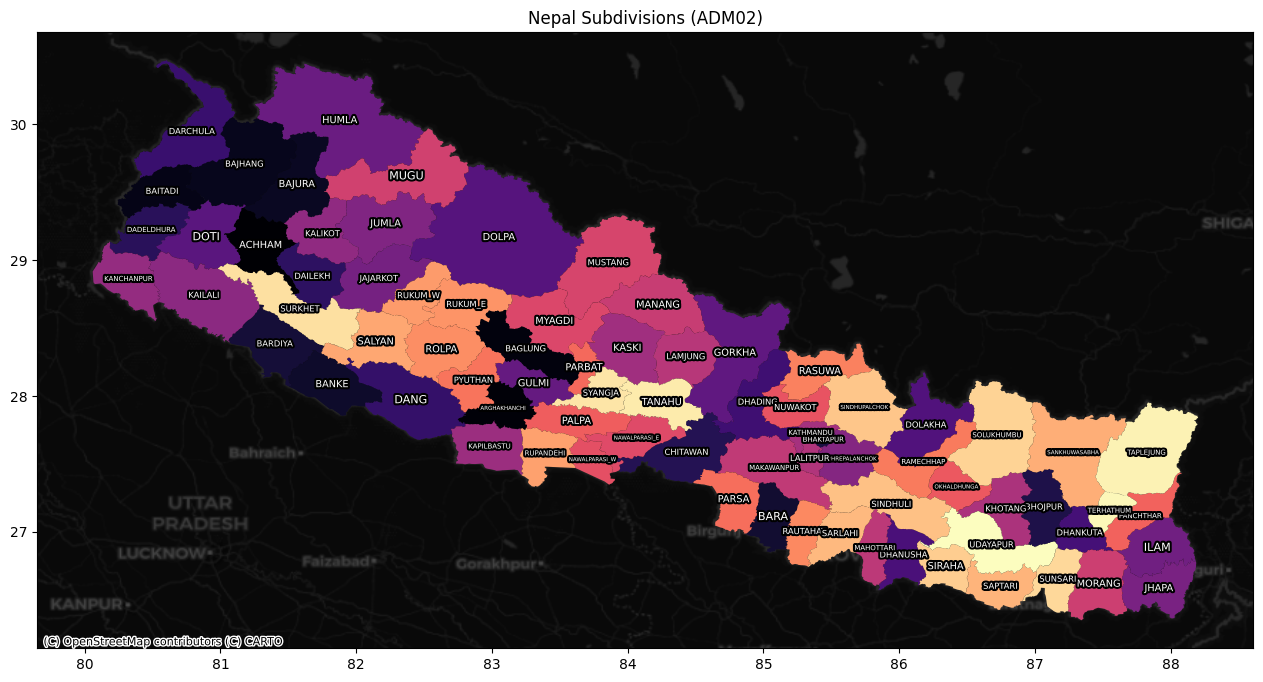

In [22]:
# Create a Plotly Express map using Mapbox
fig, ax = plt.subplots(figsize=(20, 8))

# Set alpha to fill the polygons
gdf_geojson.plot(ax=ax, column=' NAME', cmap='magma', legend=False)

# Add a map background
cx.add_basemap(ax, crs=gdf_geojson.crs, source=cx.providers.CartoDB.DarkMatter)

# Add labels at the centroid of each polygon instead of a legend
for idx, row in gdf_geojson.iterrows():
    centroid = row['geometry'].centroid

    # Adjust font size based on the length of the name, reduced by 30%
    name_length = len(row[' NAME'])
    font_size = max(4, int((20 - name_length) * 0.5))  # Ensure a minimum font size of 4

    # Add text with a white font and a black border using path_effects
    text = ax.text(centroid.x, centroid.y, row[' NAME'], fontsize=font_size, ha='center', va='center', color='white')
    text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

ax.set_title('Nepal Subdivisions (ADM02)')
plt.show()